In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [494]:
data_train ='/kaggle/input/crime-cast-forecasting-crime-categories/train.csv'

df_train = pd.read_csv(data_train)
df_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [495]:
data_test ='/kaggle/input/crime-cast-forecasting-crime-categories/test.csv'

df_test = pd.read_csv(data_test)
df_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [496]:
df_train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [497]:
df_test.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


In [498]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [499]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

In [500]:
def convert_datetime_columns(df):
    datetime_formats = {
        'Date_Reported': '%m/%d/%Y %I:%M:%S %p',
        'Date_Occurred': '%m/%d/%Y %I:%M:%S %p'
    }
    
    for col, fmt in datetime_formats.items():
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format=fmt, errors='coerce')
    
    datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
    return df, datetime_columns

df_train, train_datetime_columns = convert_datetime_columns(df_train)
train_datetime_columns 

['Date_Reported', 'Date_Occurred']

In [501]:
df_test, test_datetime_columns = convert_datetime_columns(df_test)
test_datetime_columns

['Date_Reported', 'Date_Occurred']

In [502]:
numb_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numb_columns 

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Area_ID',
 'Reporting_District_no',
 'Part 1-2',
 'Victim_Age',
 'Premise_Code',
 'Weapon_Used_Code']

In [503]:
pd.pivot_table(df_train, index='Area_ID', columns='Area_Name', aggfunc='size', fill_value=0)

Area_Name,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
Area_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0,1156,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,931,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1130,0,0,0,0,0
4.0,0,0,0,0,0,755,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,872,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,1014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,943
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,910,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,902,0,0,0


In [504]:
pd.pivot_table(df_train, index='Weapon_Used_Code', columns='Weapon_Description', aggfunc='size', fill_value=0)

Weapon_Description,AIR PISTOL/REVOLVER/RIFLE/BB GUN,ASSAULT WEAPON/UZI/AK47/ETC,AXE,BELT FLAILING INSTRUMENT/CHAIN,BLUNT INSTRUMENT,BOARD,BOMB THREAT,BOTTLE,BOWIE KNIFE,BRASS KNUCKLES,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",STUN GUN,SWITCH BLADE,TIRE IRON,TOY GUN,UNKNOWN FIREARM,UNKNOWN TYPE CUTTING INSTRUMENT,UNKNOWN WEAPON/OTHER WEAPON,VEHICLE,VERBAL THREAT
Weapon_Used_Code,,,,,,,,,,,,,,,,,,,,,
101.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,131,0,0,0,0
107.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [505]:
pd.pivot_table(df_train, index='Premise_Code', columns='Premise_Description', aggfunc='size', fill_value=0)

Premise_Description,7TH AND METRO CENTER (NOT LINE SPECIFIC),ABANDONED BUILDING ABANDONED HOUSE,ABORTION CLINIC/ABORTION FACILITY*,ALLEY,AMUSEMENT PARK*,APARTMENT/CONDO COMMON LAUNDRY ROOM,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)",AUTO REPAIR SHOP,AUTO SALES LOT,AUTO SUPPLY STORE*,...,UNDERPASS/BRIDGE*,VACANT LOT,VALET,"VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)","VEHICLE, PASSENGER/TRUCK",VETERINARIAN/ANIMAL HOSPITAL,VISION CARE FACILITY*,WAREHOUSE,WEBSITE,YARD (RESIDENTIAL/BUSINESS)
Premise_Code,,,,,,,,,,,,,,,,,,,,,
101.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103.0,0,0,0,138,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107.0,0,0,0,0,0,0,0,0,0,0,...,0,9,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
958.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [506]:
def drop_unwanted_columns(df):
    columns_to_drop = ['Area_ID', 'Premise_Code', 'Weapon_Used_Code']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    return df

df_train = drop_unwanted_columns(df_train)
df_test = drop_unwanted_columns(df_test)

Оскільки Weapon_Used_Code дублює інформацію з Weapon_Description, вирішено видалити цю колонку. Так само Area_ID та Premise_Code.

In [507]:
pd.pivot_table(df_train, index='Crime_Category', columns='Part 1-2', aggfunc='size', fill_value=0)

Part 1-2,1.0,2.0
Crime_Category,,
Crimes against Persons,33,192
Crimes against Public Order,331,1477
Fraud and White-Collar Crimes,0,1355
Other Crimes,0,179
Property Crimes,9658,2008
Violent Crimes,1615,3152


In [508]:
def convert_to_category(df):
    if 'Part 1-2' in df.columns:
        df['Part 1-2'] = df['Part 1-2'].astype('category')
    
    categorical_columns = df.select_dtypes(include=['category']).columns.tolist()
    return df, categorical_columns

df_train, train_categorical_columns = convert_to_category(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               20000 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               20000 non-null  float64       
 3   Longitude              20000 non-null  float64       
 4   Date_Reported          20000 non-null  datetime64[ns]
 5   Date_Occurred          20000 non-null  datetime64[ns]
 6   Time_Occurred          20000 non-null  float64       
 7   Area_Name              20000 non-null  object        
 8   Reporting_District_no  20000 non-null  float64       
 9   Part 1-2               20000 non-null  category      
 10  Modus_Operandi         17259 non-null  object        
 11  Victim_Age             20000 non-null  float64       
 12  Victim_Sex             17376 non-null  object        
 13  V

Part 1-2 це якась внутрішня класифікація злочинів тому я перевела її з числового типу в категоріальний. 

In [509]:
df_test, test_categorical_columns = convert_to_category(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               5000 non-null   object        
 1   Cross_Street           810 non-null    object        
 2   Latitude               5000 non-null   float64       
 3   Longitude              5000 non-null   float64       
 4   Date_Reported          5000 non-null   datetime64[ns]
 5   Date_Occurred          5000 non-null   datetime64[ns]
 6   Time_Occurred          5000 non-null   float64       
 7   Area_Name              5000 non-null   object        
 8   Reporting_District_no  5000 non-null   float64       
 9   Part 1-2               5000 non-null   category      
 10  Modus_Operandi         4316 non-null   object        
 11  Victim_Age             5000 non-null   float64       
 12  Victim_Sex             4357 non-null   object        
 13  Vic

In [510]:
numb_columns_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numb_columns_train

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Reporting_District_no',
 'Victim_Age']

In [511]:
numb_columns_test = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numb_columns_test

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Reporting_District_no',
 'Victim_Age']

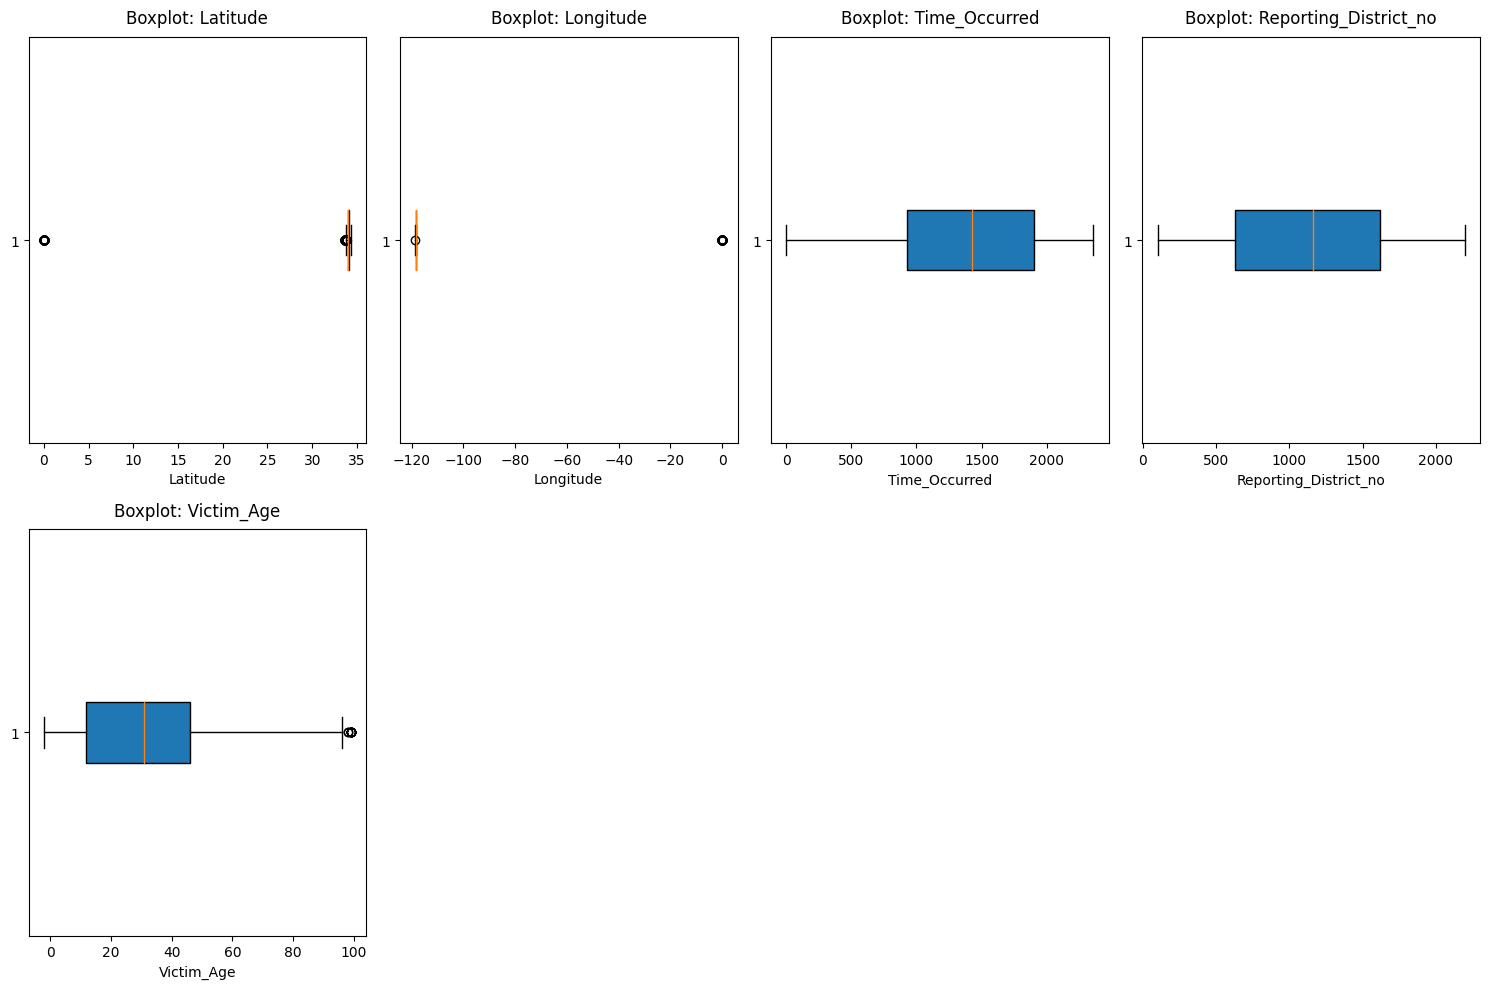

In [512]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numb_columns_train, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df_train[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot: {column}', pad=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [513]:
def clean_data(df):
    if 'Latitude' in df.columns:
        df = df[df['Latitude'] >= 30]
    if 'Victim_Age' in df.columns:
        df = df[(df['Victim_Age'] >= 10) & (df['Victim_Age'] <= 100)]
    return df

df_train = clean_data(df_train)
df_test = clean_data(df_test)

**Видаляємо неправдоподібні значення:**
* Широта має бути в межах Каліфорнії (>=30)
* Вік жертви від 10 до 100 років

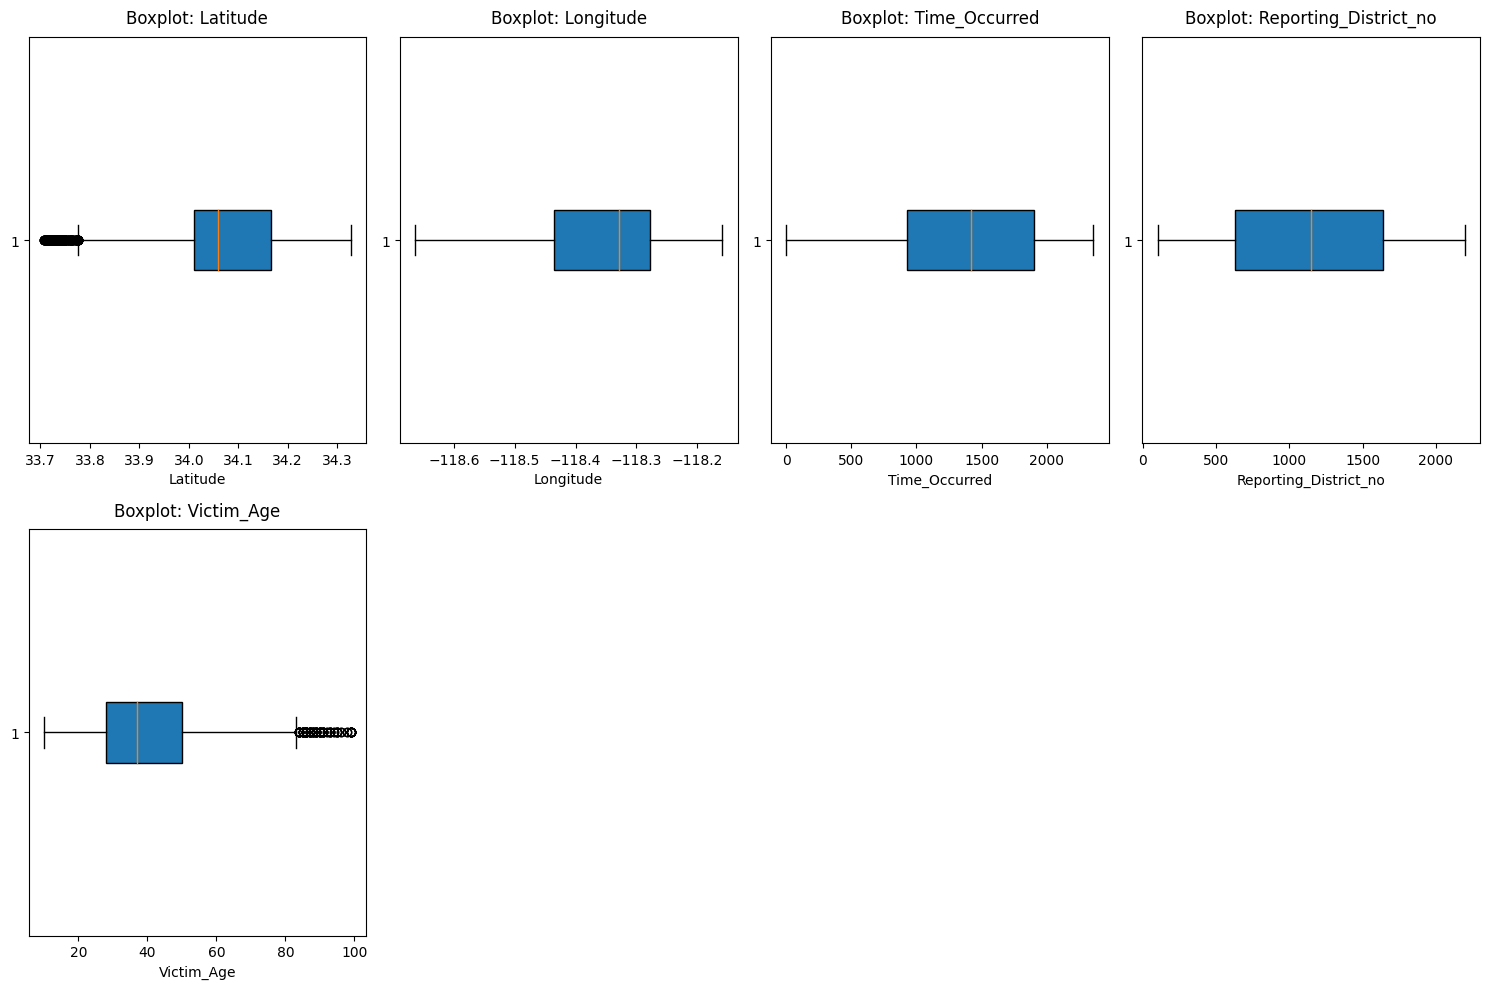

In [514]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numb_columns_train, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df_train[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot: {column}', pad=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

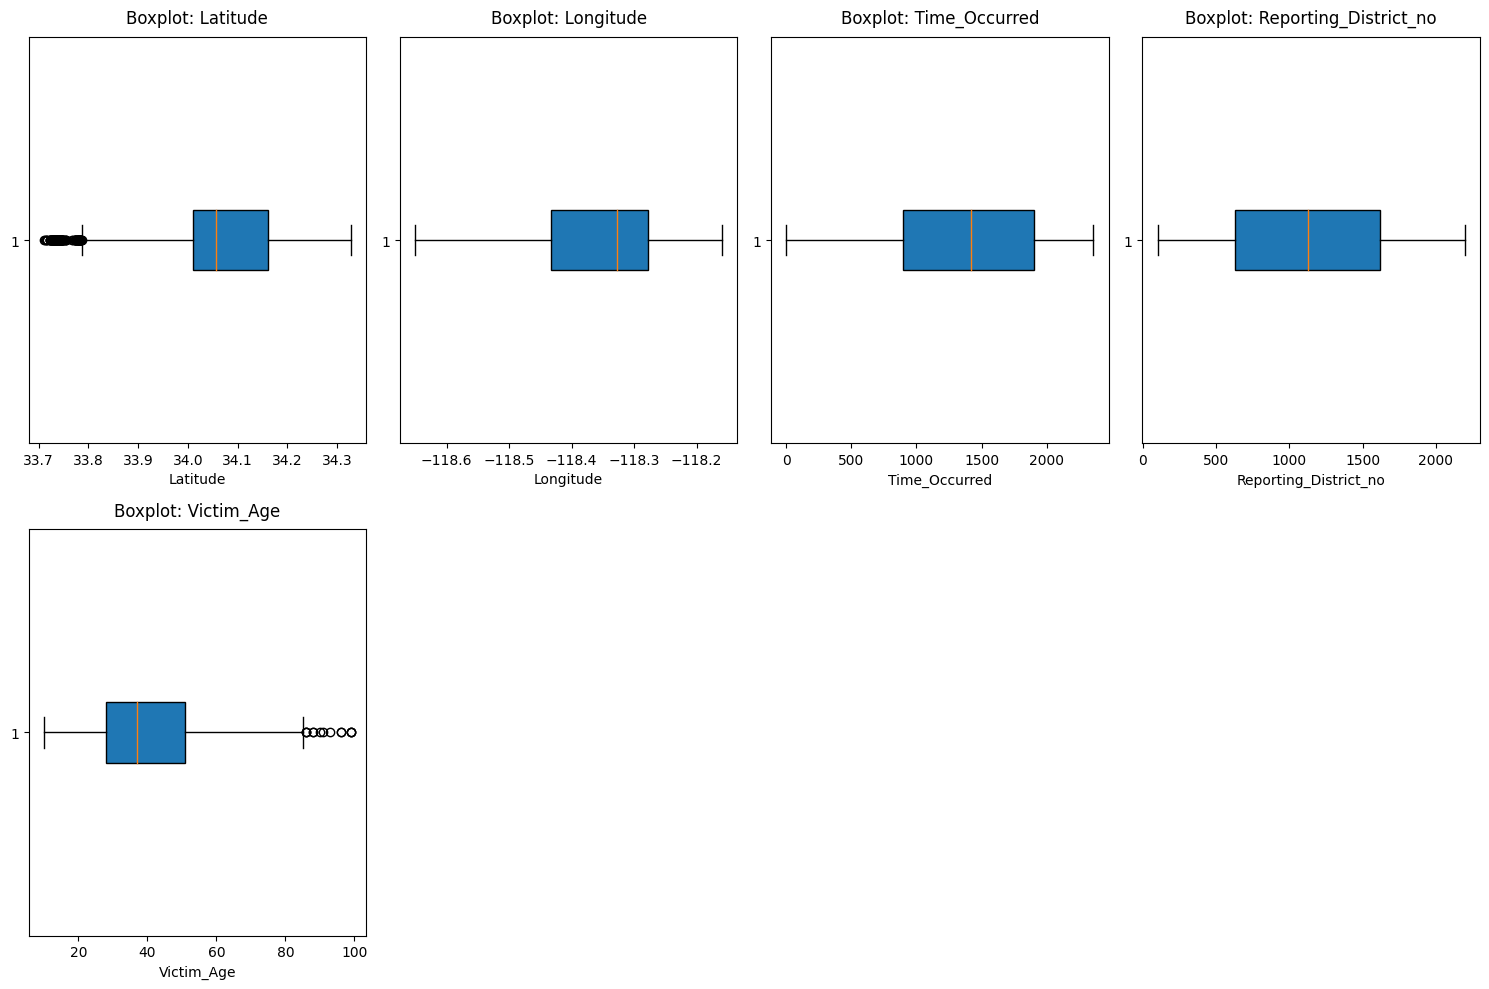

In [515]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numb_columns_test, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df_test[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot: {column}', pad=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

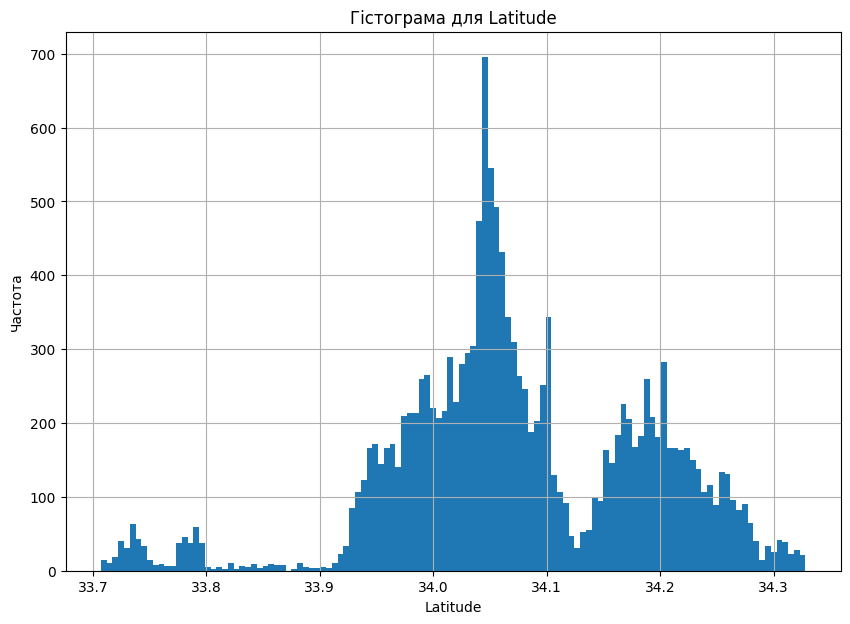

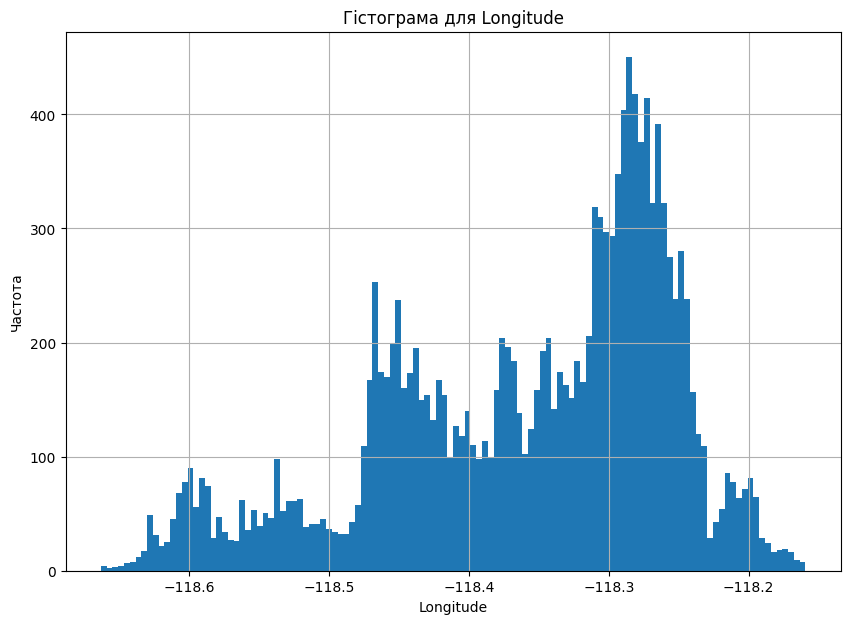

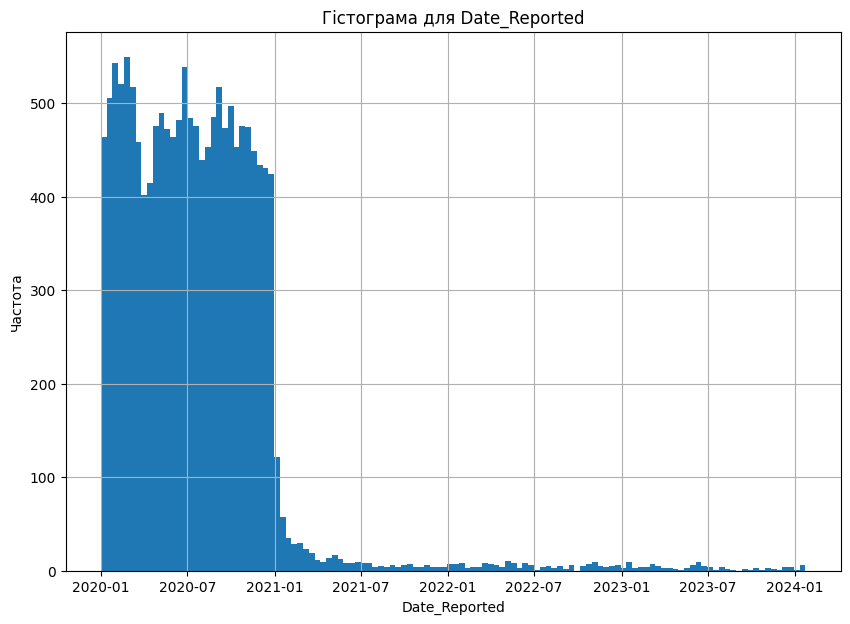

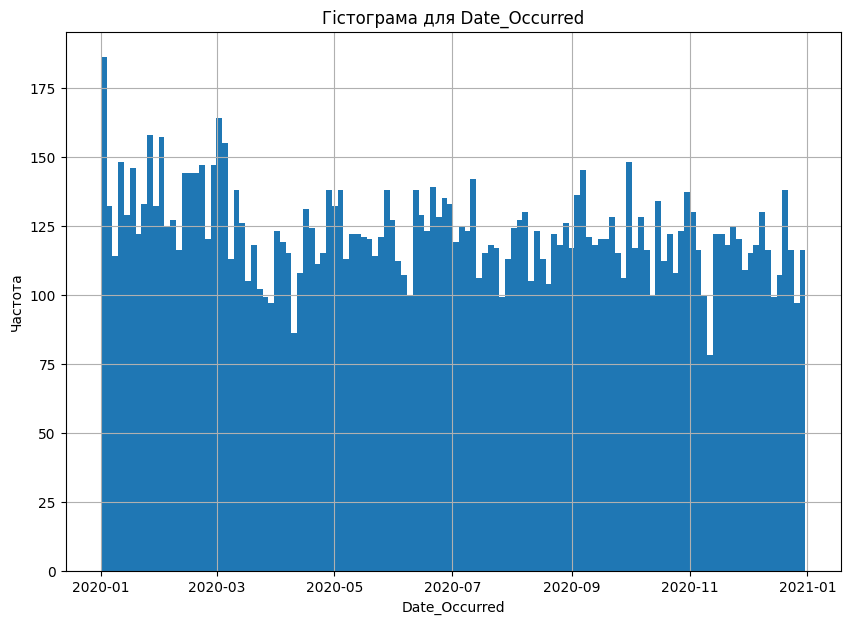

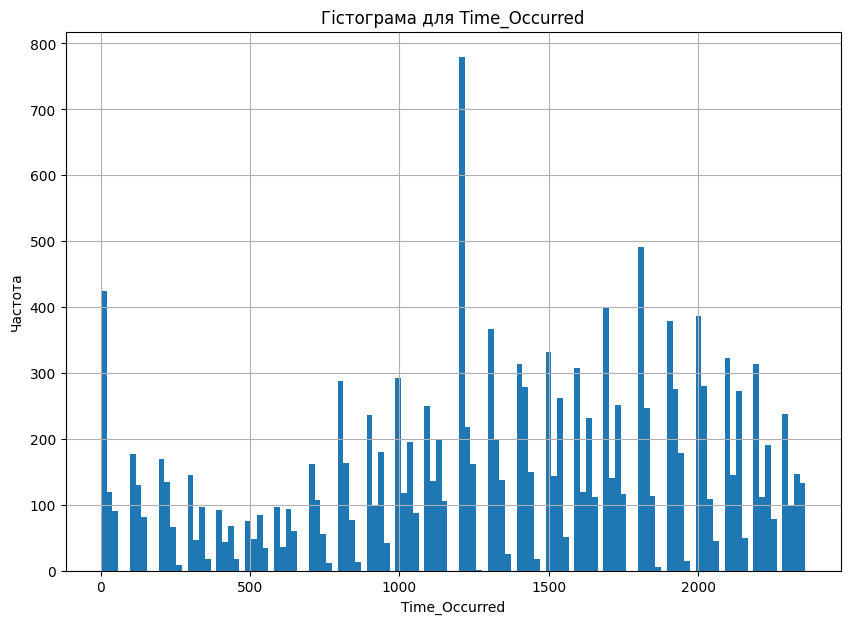

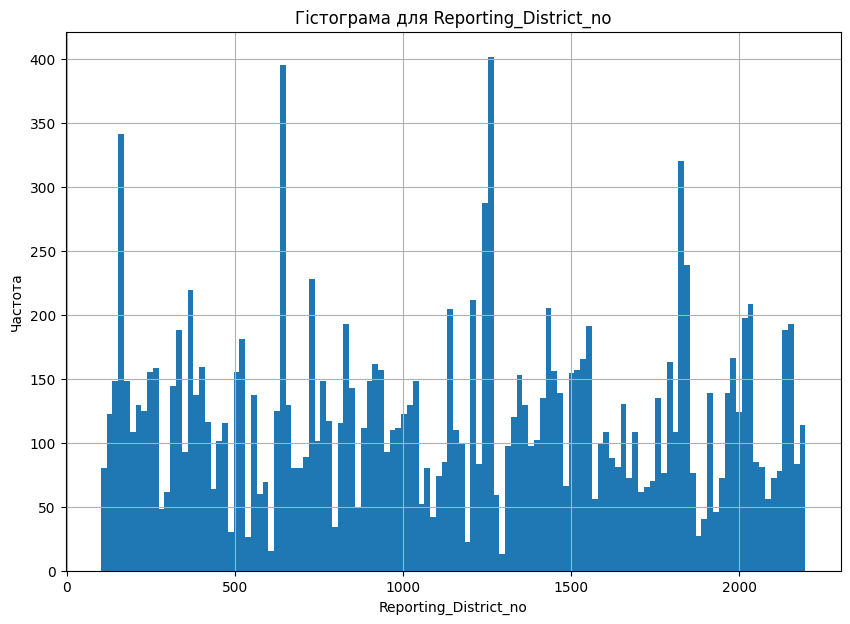

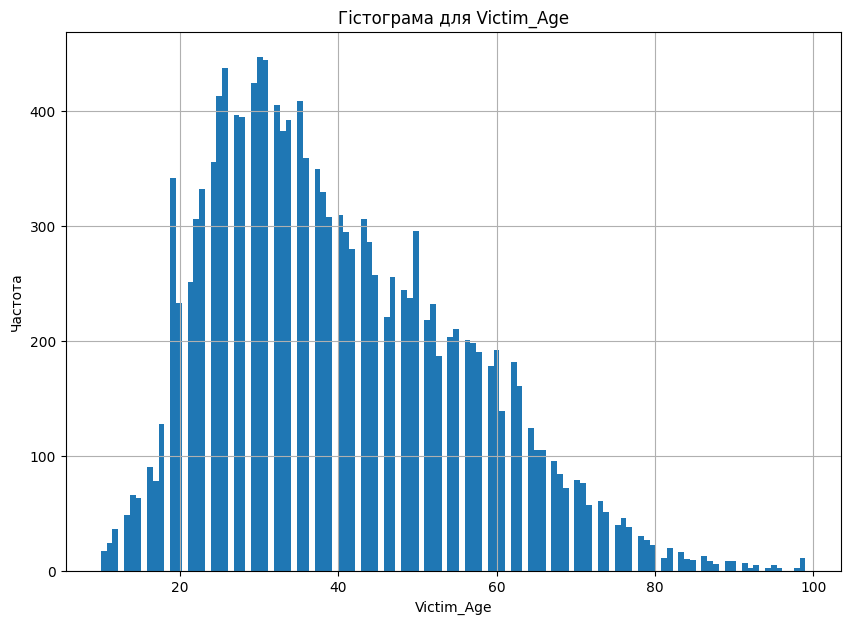

In [595]:
n_rows = len(df_train)
n_bins = int(math.sqrt(n_rows))

for col in numb_columns_train:
    plt.figure(figsize=(10, 7))
    df_train[col].hist(bins=n_bins)
    plt.title(f'Гістограма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

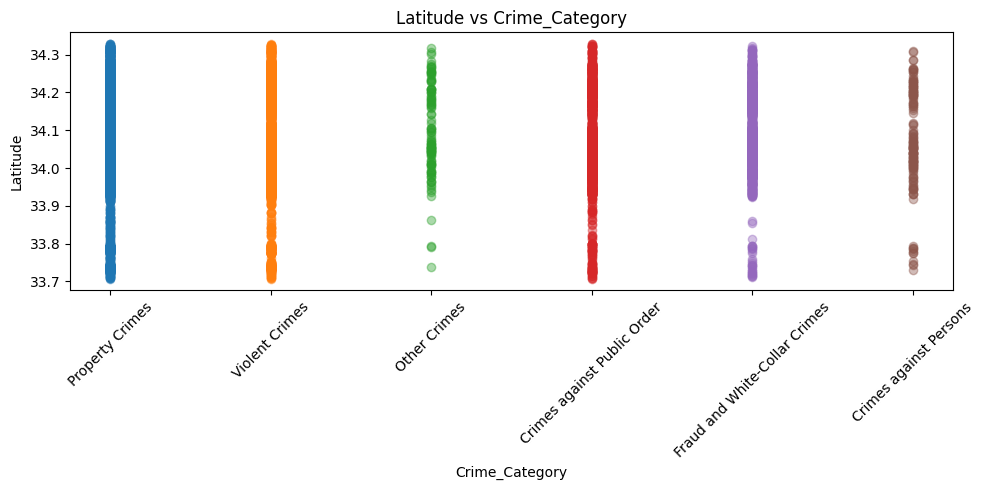

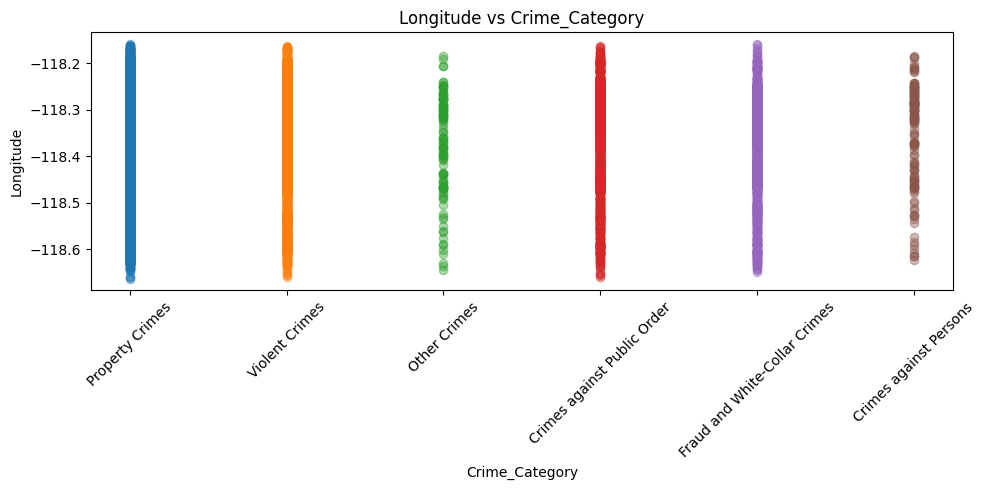

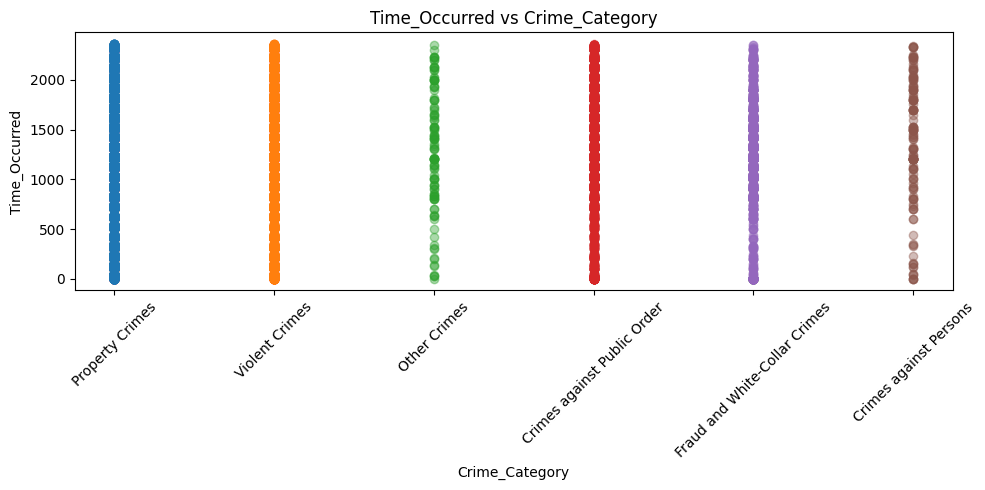

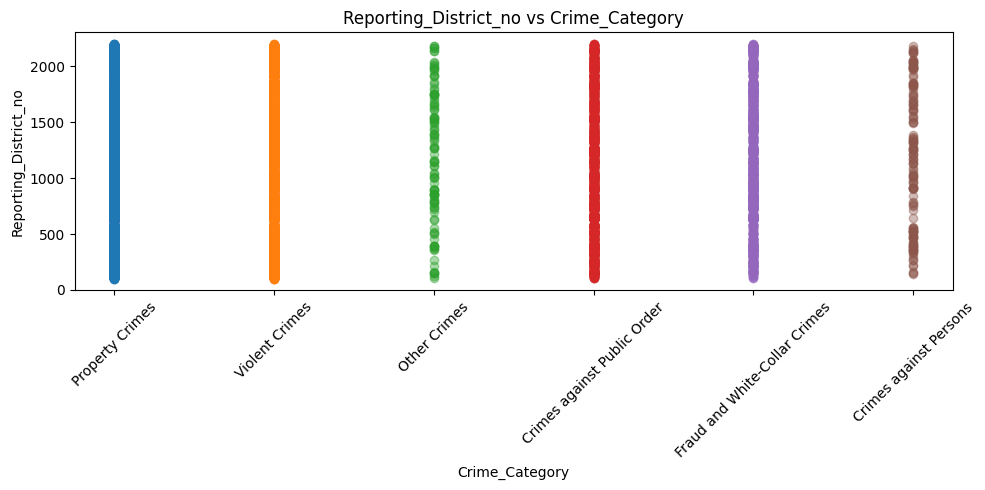

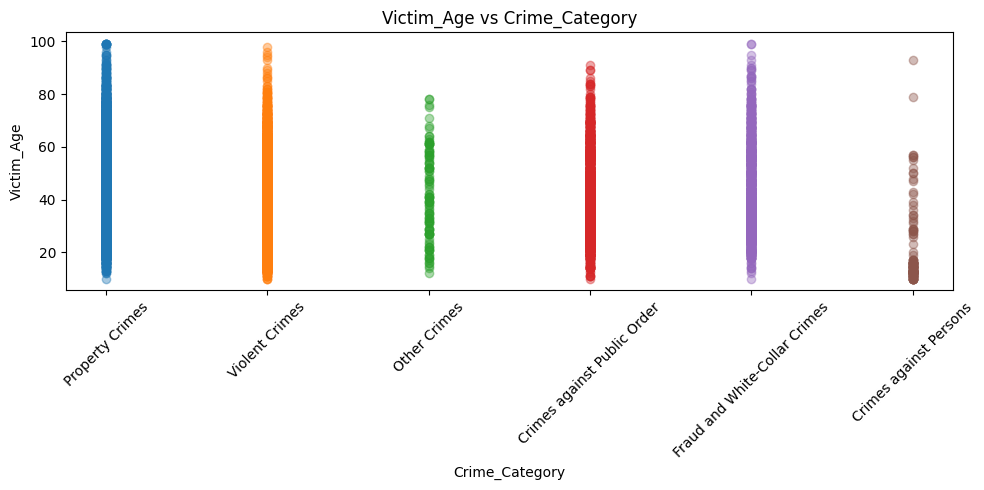

In [516]:
categories = df_train['Crime_Category'].unique()

for col in numb_columns_train:
    plt.figure(figsize=(10, 5))
    
    for i, category in enumerate(categories):
        y_vals = df_train[df_train['Crime_Category'] == category][col]
        x_vals = [i] * len(y_vals)
        plt.scatter(x_vals, y_vals, alpha=0.4, label=str(category))
    
    plt.title(f'{col} vs Crime_Category')
    plt.xlabel('Crime_Category')
    plt.ylabel(col)
    plt.xticks(ticks=range(len(categories)), labels=categories, rotation=45)
    plt.tight_layout()
    plt.show()


In [517]:
for col in numb_columns_train:
    group_var = df_train.groupby('Crime_Category')[col].mean().var()
    print(f'{col}: Варіативність між групами = {group_var:.2f}')

Latitude: Варіативність між групами = 0.00
Longitude: Варіативність між групами = 0.00
Time_Occurred: Варіативність між групами = 4837.19
Reporting_District_no: Варіативність між групами = 1409.80
Victim_Age: Варіативність між групами = 79.40


**Інтерпретація результатів:**

* Latitude/Longitude (0.00):
Нульова дисперсія свідчить про те, що координати (широта/довгота) не відрізняються для різних категорій злочинів. Наприклад, усі злочини відбуваються в одному місці, або розподіл координат однаковий для всіх категорій.

* Time_Occurred (4837.19):
Велика дисперсія означає, що час скоєння злочинів суттєво відрізняється залежно від їх категорії. Наприклад, одні злочини частіше відбуваються вночі, інші — вдень.

* Reporting_District_no (1409.80):
Помітна дисперсія вказує, що різні категорії злочинів концентруються в різних районах (наприклад, крадіжки в одних районах, напади — в інших).

* Victim_Age (79.40):
Середній вік жертв варіює для різних злочинів (наприклад, одні злочини спрямовані на молодь, інші — на літніх людей).

**Висновок:**
* Latitude/Longitude: Можливо, дані географічно одноманітні або несуть мало інформації для класифікації.

* Time_Occurred, Reporting_District_no, Victim_Age: Ці ознаки можуть бути корисними для прогнозування категорії злочину, оскільки їх середні значення залежать від типу злочину.

In [518]:
categor_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
categor_columns 

['Location',
 'Cross_Street',
 'Area_Name',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Description',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

In [605]:
y_target = df_train['Crime_Category']
y_target

KeyError: 'Crime_Category'

In [552]:
categor_columns_test = df_test.select_dtypes(include=['object', 'category']).columns.tolist()
categor_columns_test

['Location',
 'Cross_Street',
 'Area_Name',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Description',
 'Weapon_Description',
 'Status',
 'Status_Description']

In [521]:
categor_columns_train = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
categor_columns_train

['Location',
 'Cross_Street',
 'Area_Name',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Description',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

In [549]:
df_train = df_train.drop(columns='Crime_Category')

KeyError: "['Crime_Category'] not found in axis"

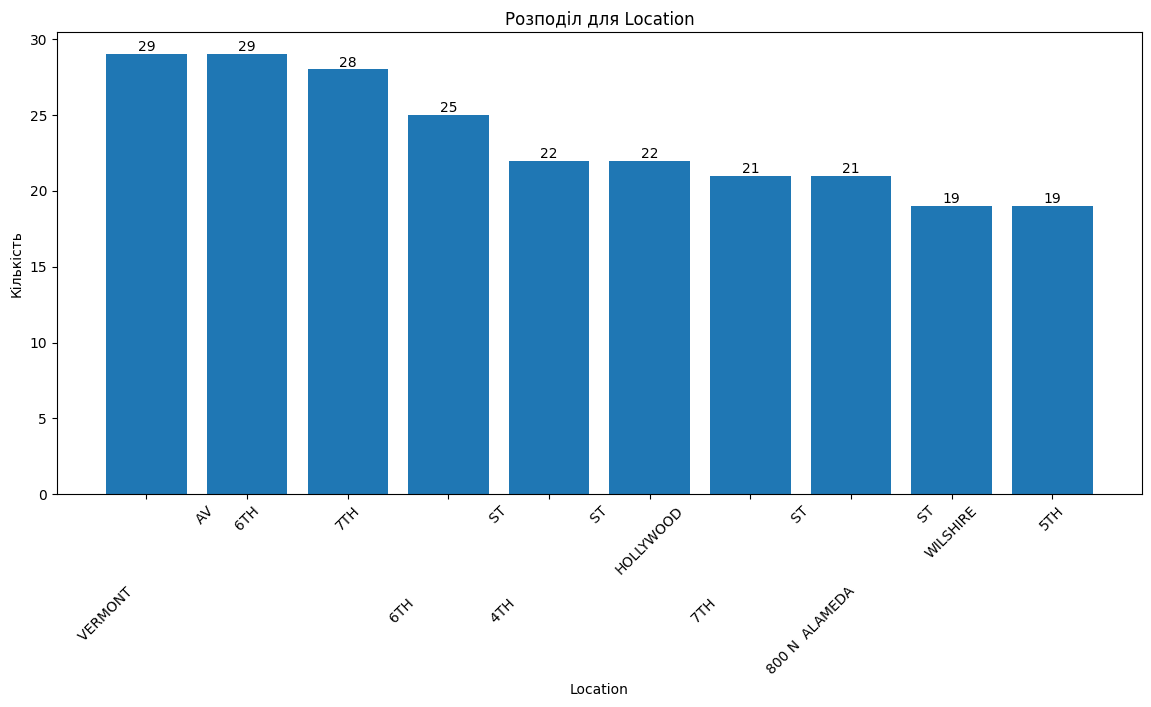

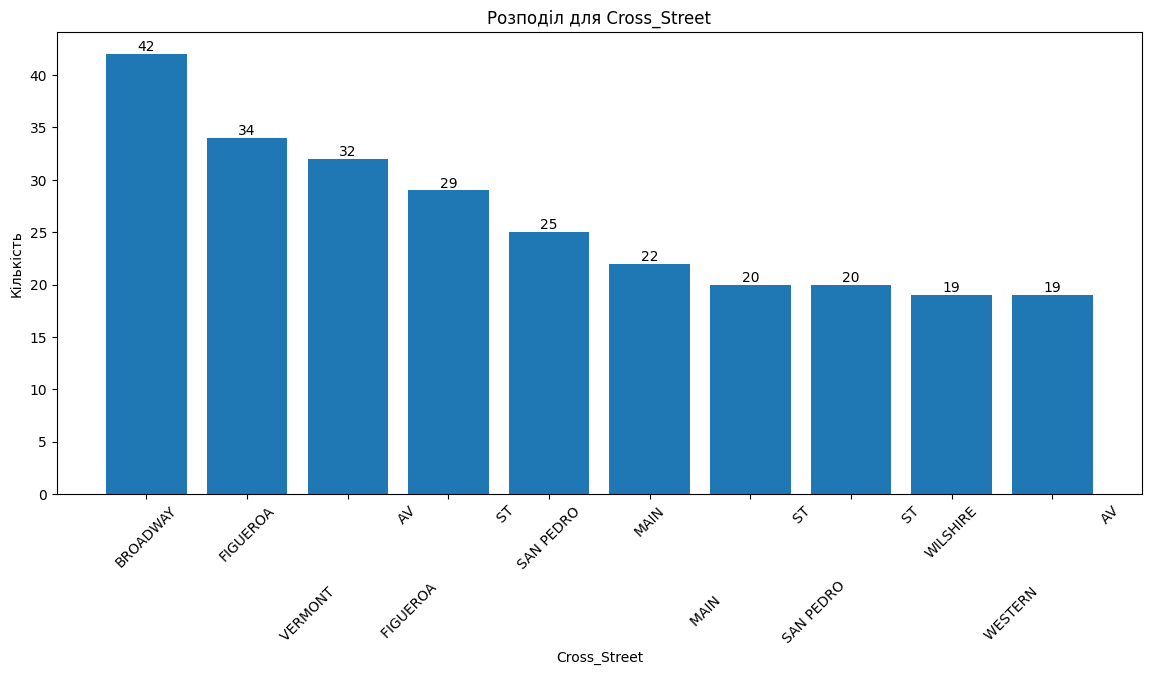

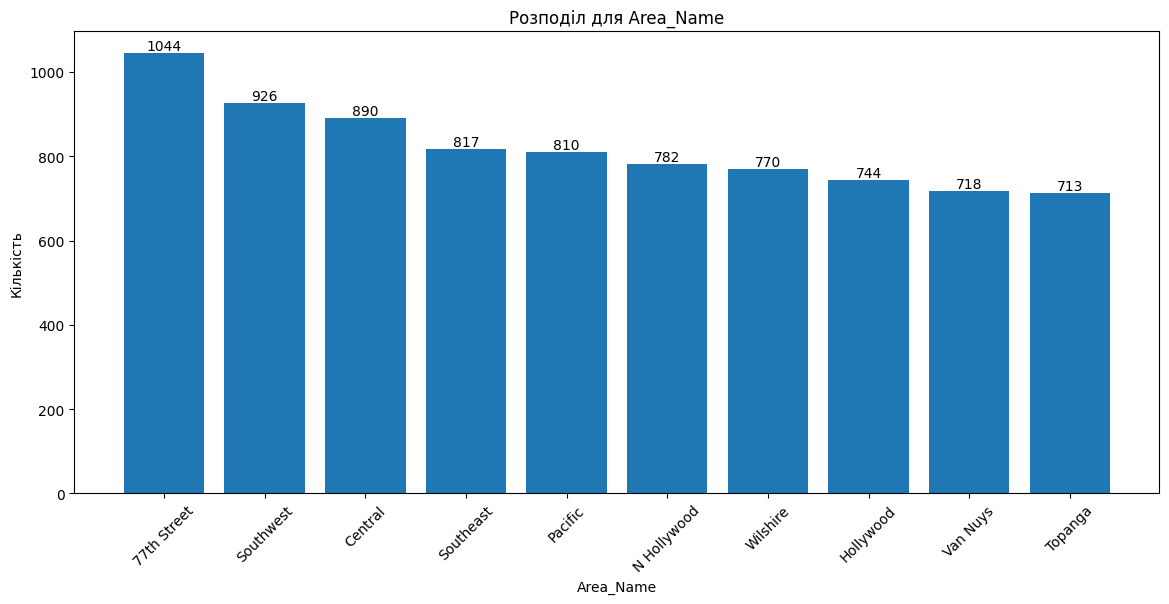

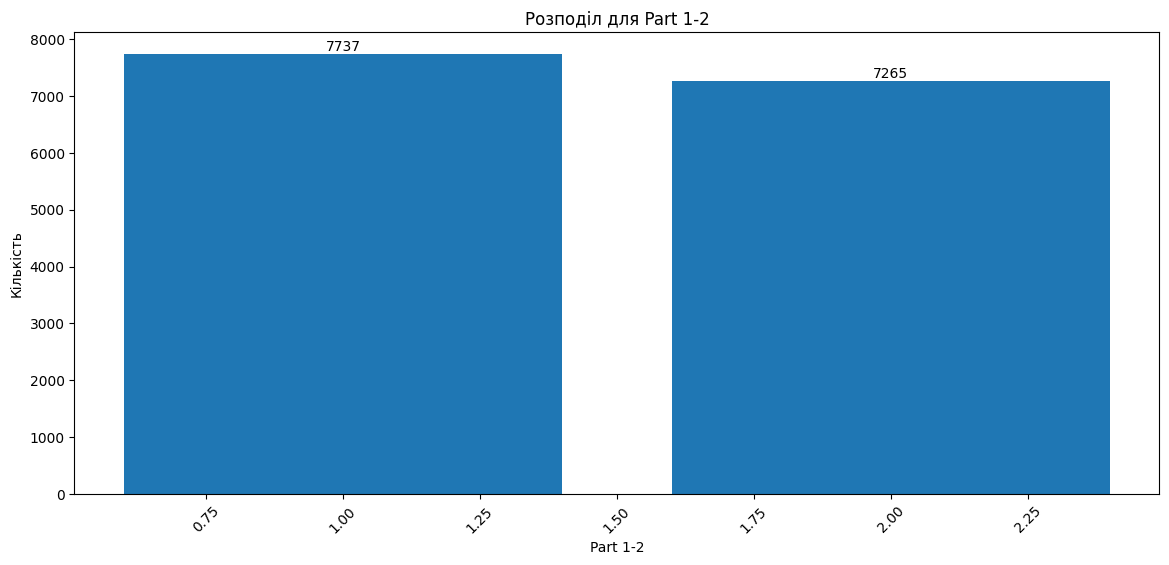

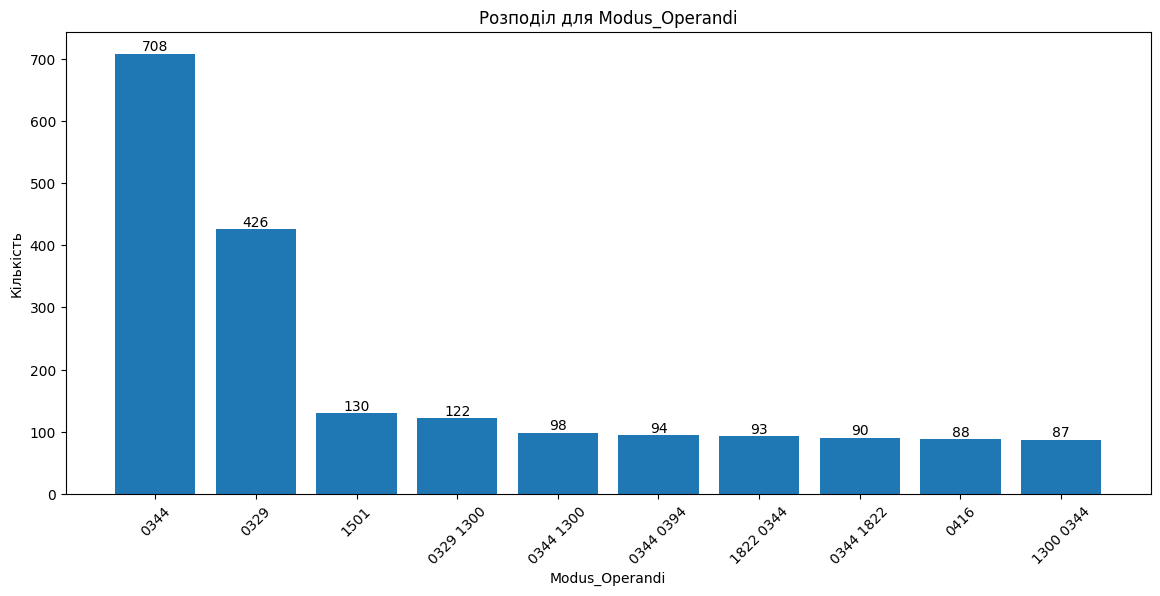

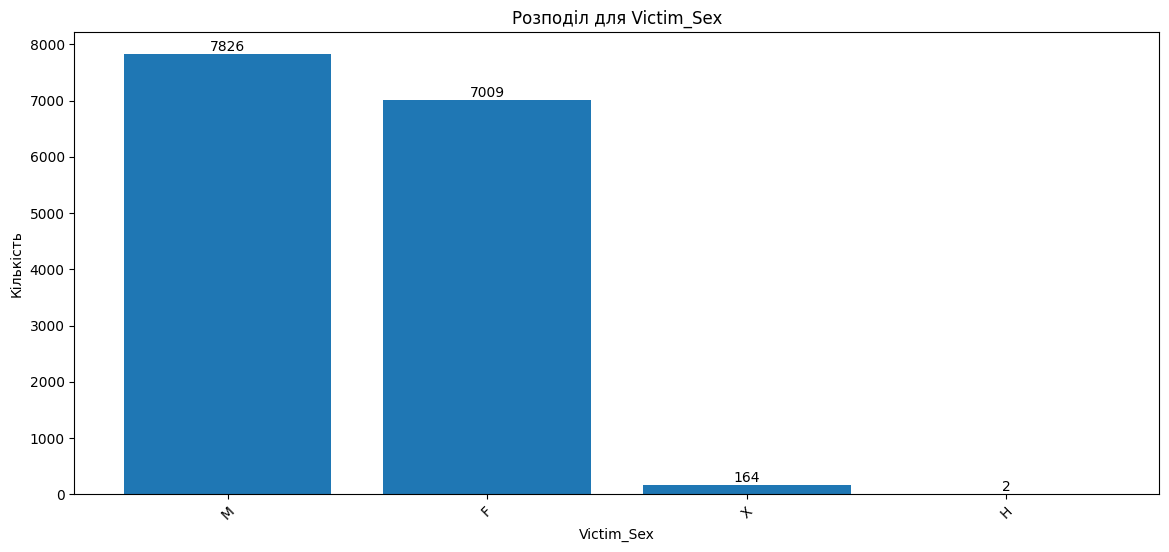

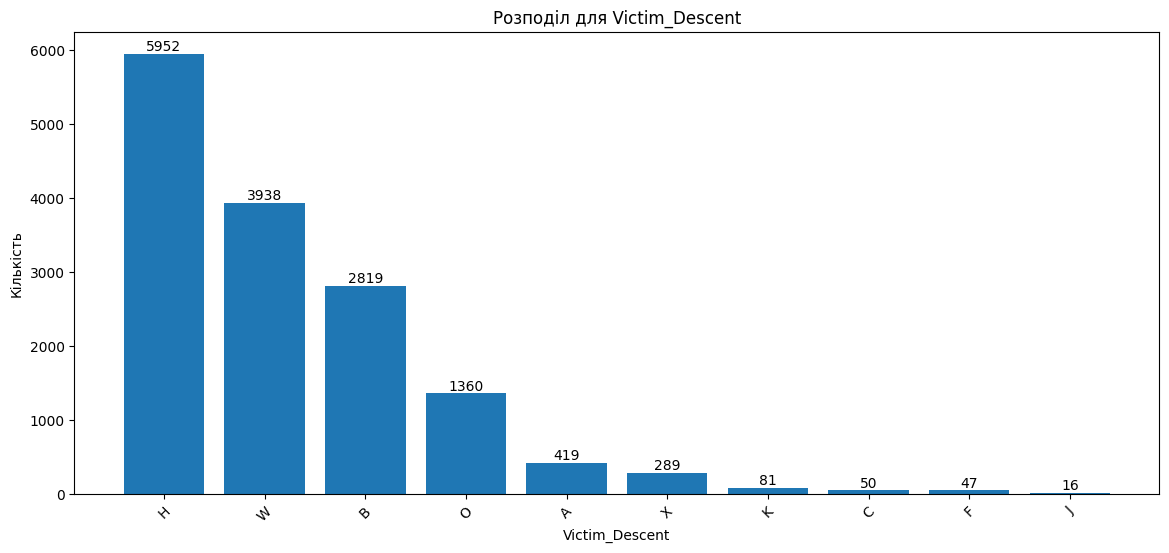

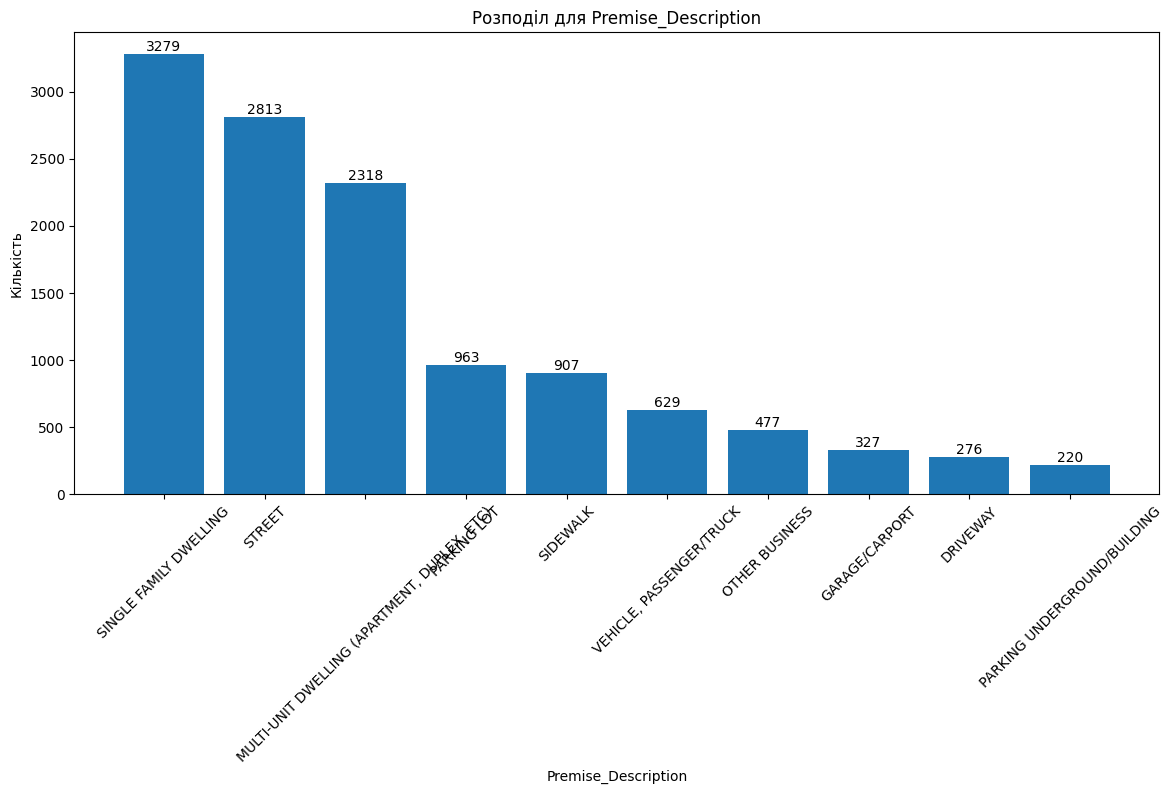

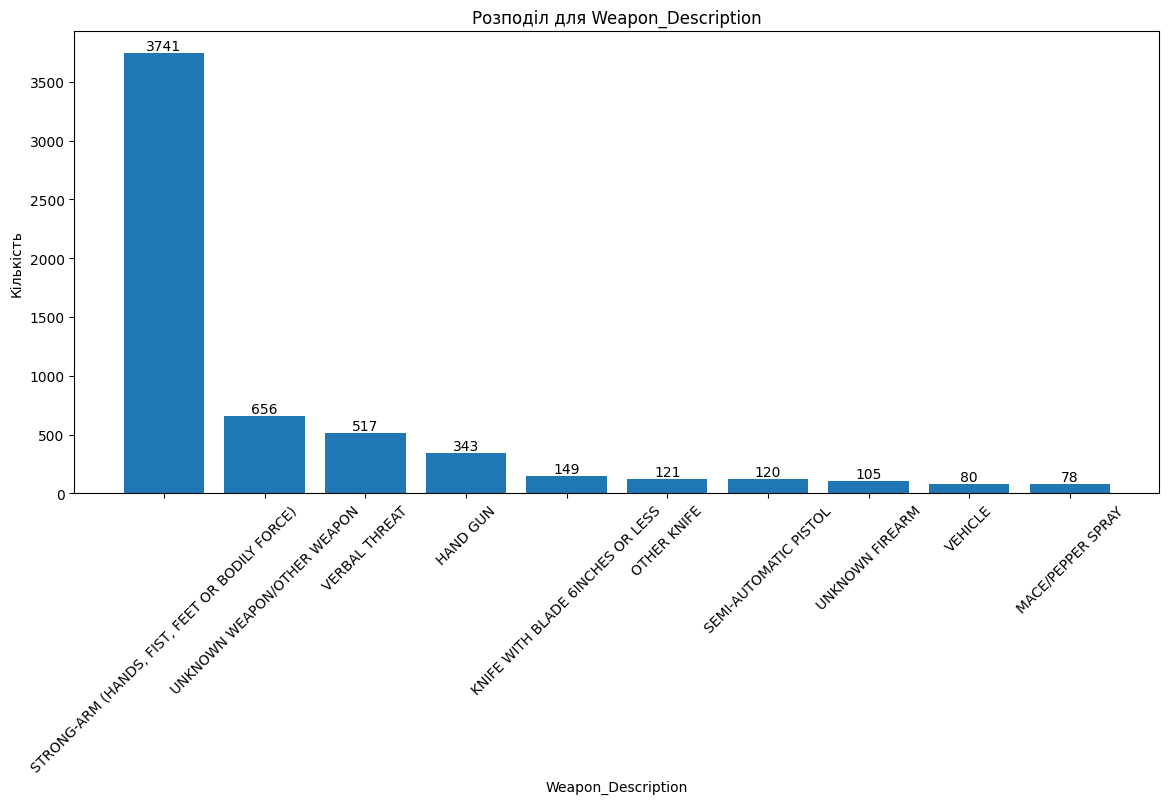

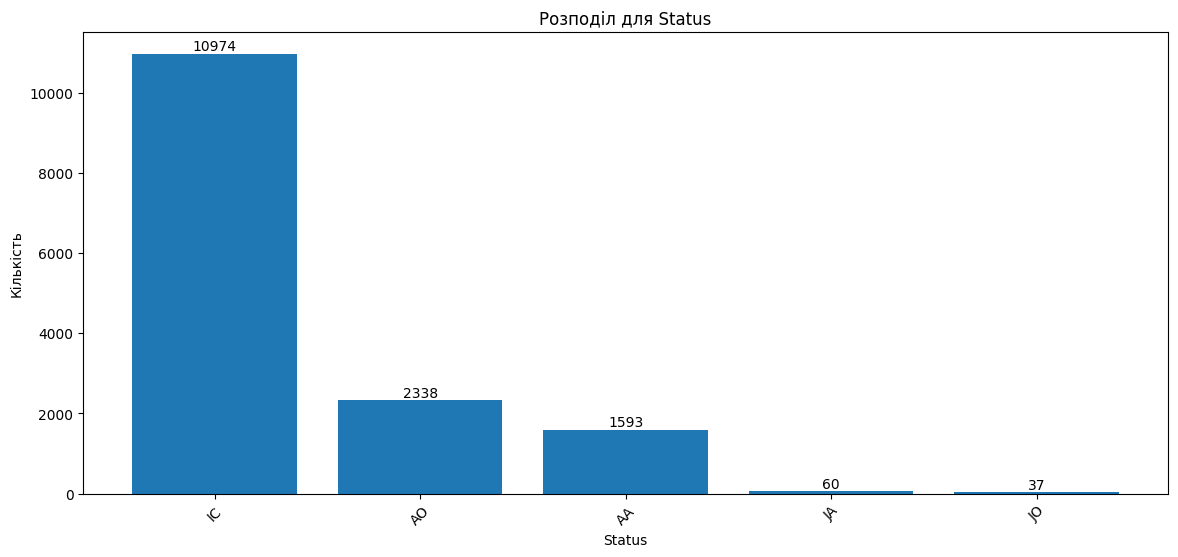

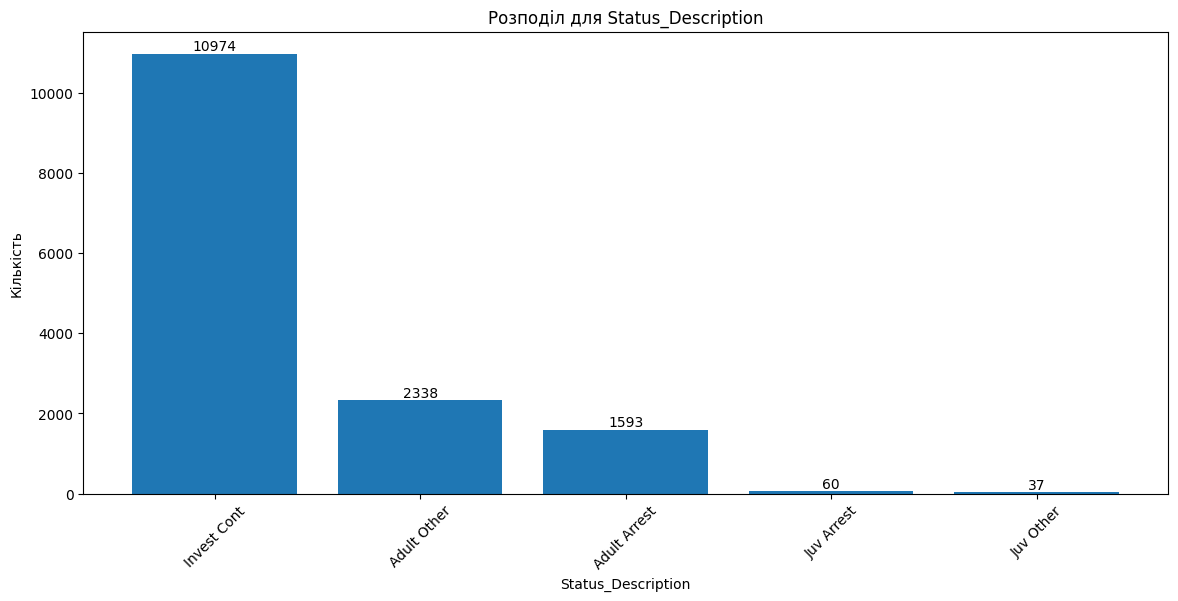

In [523]:
for cat_col in categor_columns:
    if cat_col in df_train.columns:
        value_counts = df_train[cat_col].value_counts().head(10)

        plt.figure(figsize=(14, 6))
        bars = plt.bar(value_counts.index, value_counts.values)

        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height,
                     f'{height}', ha='center', va='bottom')

        plt.title(f'Розподіл для {cat_col}')
        plt.ylabel('Кількість')
        plt.xlabel(cat_col)
        plt.xticks(rotation=45)
        plt.show()

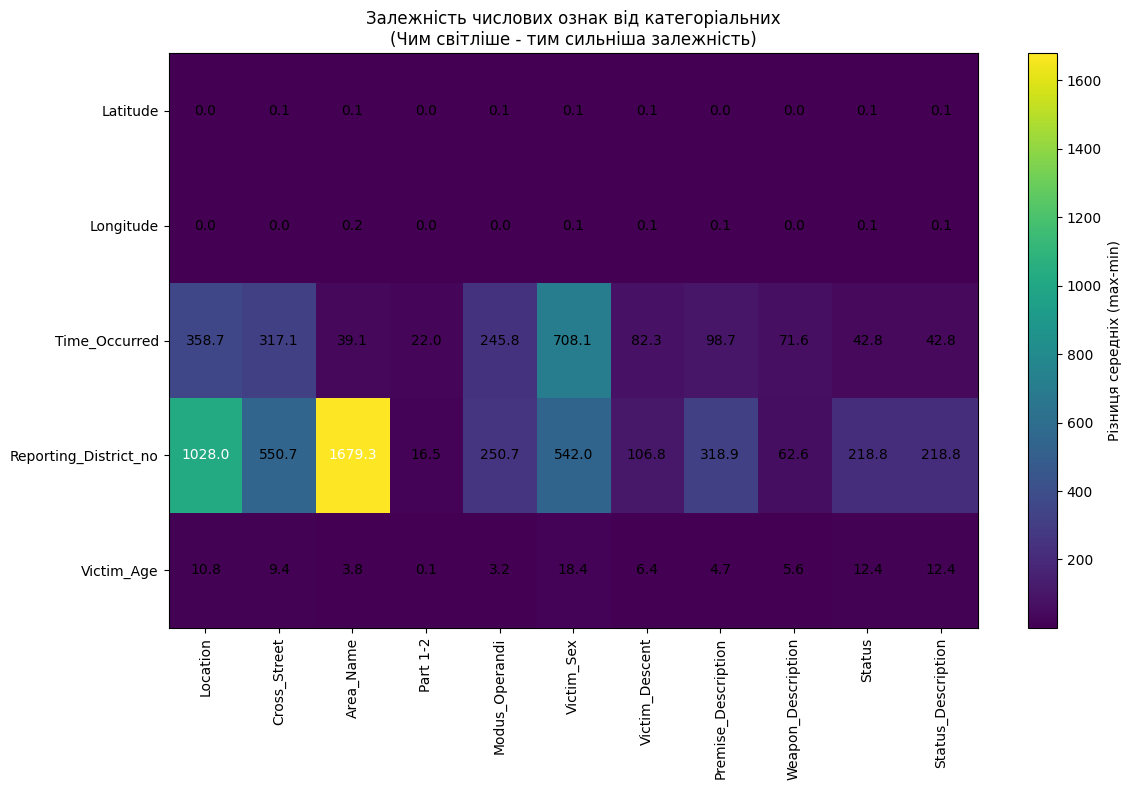

In [524]:
numb_columns_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

top_categories = {}
for cat_col in categor_columns:
    if cat_col in df_train.columns:
        top_categories[cat_col] = df_train[cat_col].value_counts().head(5).index.tolist()

results = []
for num_col in numb_columns_train:
    row = []
    for cat_col in categor_columns:
        if cat_col in df_train.columns:
            means = []
            for category in top_categories[cat_col]:
                means.append(df_train[df_train[cat_col] == category][num_col].mean())
            row.append(np.ptp(means))
    results.append(row)

corr_matrix = pd.DataFrame(results,
                           index=numb_columns_train,
                           columns=categor_columns[:len(results[0])])

plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Різниця середніх (max-min)')
plt.xticks(np.arange(len(categor_columns[:len(results[0])])), categor_columns[:len(results[0])], rotation=90)
plt.yticks(np.arange(len(numb_columns_train)), numb_columns_train)
plt.title('Залежність числових ознак від категоріальних\n(Чим світліше - тим сильніша залежність)')

for i in range(len(numb_columns_train)):
    for j in range(len(categor_columns[:len(results[0])])):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.1f}",
                 ha="center", va="center",
                 color="w" if corr_matrix.iloc[i, j] > corr_matrix.values.max() / 2 else "black")

plt.tight_layout()
plt.show()

**Висновок до даних:**
* Географічні координати (Latitude, Longitude):

Дуже слабка залежність (значення близькі до 0) від категорійних змінних. Це означає, що місце скоєння злочинів практично не залежить від їх типу, що може свідчити про рівномірний розподіл злочинів у просторі.

* Час (Time_Occurred):

Сильна залежність (значення до 708.1) для деяких категорій. Наприклад, певні типи злочинів (напади, крадіжки) частіше відбуваються в конкретний час доби (наприклад, вночі).

* Район (Reporting_District_no):

Помітна залежність (значення до 1679.3). Окремі категорії злочинів концентруються в певних районах, що може бути пов’язано з соціально-економічними факторами.

* Вік жертви (Victim_Age):

Середня залежність (значення до 12.4). Деякі злочини (наприклад, крадіжки) частіше спрямовані на молодь, тоді як інші (шахрайство) — на літніх.

* Інші категоріальні змінні (Location, Victim_Sex тощо):

Для них спостерігаються різні рівні залежності, але менш виражені порівняно з часом або районом.

**Рекомендації:**
* Для прогнозування типу злочину найкориснішими ознаками є час, район та вік жертви.

* Координати можна виключити з аналізу, оскільки вони не несуть корисної інформації для класифікації.

* Візуалізація підтверджує, що світліші кольори на тепловій карті відповідають сильнішим залежностям, що допомагає швидко ідентифікувати ключові закономірності.

**Підсумок:** Найбільший вплив на категорію злочину мають час, географічний район та демографічні дані жертв.

In [577]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt

high_card_cols = ['Location', 'Cross_Street', 'Modus_Operandi']
low_card_cols = ['Area_Name', 'Part 1-2', 'Victim_Sex', 'Victim_Descent',
                 'Premise_Description', 'Weapon_Description',
                 'Status', 'Status_Description']
categor_columns = high_card_cols + low_card_cols

numb_columns_train = [col for col in df_train.columns if col not in categor_columns and col != 'target_column']

In [526]:
def frequency_encoder(X):
    if isinstance(X, pd.DataFrame):
        return X.apply(lambda col: col.map(col.value_counts(normalize=True)))
    elif isinstance(X, np.ndarray):
        df = pd.DataFrame(X)
        return df.apply(lambda col: col.map(col.value_counts(normalize=True))).values
    return X

In [527]:
high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),
    ('freq_encoder', FunctionTransformer(frequency_encoder))
])

In [528]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [529]:
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator=LinearRegression(), random_state=42))
])

In [530]:
preprocessor = ColumnTransformer(transformers=[
    ('high_card', high_card_transformer, high_card_cols),
    ('low_card', categorical_transformer, low_card_cols),
    ('num', numerical_transformer, numb_columns_train)
])

In [ ]:
le = LabelEncoder()
y_target_numeric = le.fit_transform(y_target)

In [575]:
class_counts = np.bincount(y_target_numeric)
total_samples = np.sum(class_counts)
class_weights = total_samples / (len(class_counts) * class_counts)
weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [597]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
    }
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(**params, random_state=42))
    ])
    
    score = cross_val_score(model, df_train, y_target_numeric, 
                          scoring='f1_weighted', cv=3).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Найкращі параметри:", study.best_params)

[I 2025-04-21 17:10:46,189] A new study created in memory with name: no-name-4d13c9a4-b414-4d42-98e3-f80f9319cb48
[I 2025-04-21 17:10:52,298] Trial 0 finished with value: 0.8249443350298405 and parameters: {'n_estimators': 221, 'max_depth': 3, 'learning_rate': 0.1260887672129381, 'subsample': 0.9937226886291901, 'colsample_bytree': 0.9802149720671343, 'reg_alpha': 0.20539917229124882, 'reg_lambda': 0.29051152030063865}. Best is trial 0 with value: 0.8249443350298405.
[I 2025-04-21 17:11:11,711] Trial 1 finished with value: 0.8143793681542523 and parameters: {'n_estimators': 488, 'max_depth': 8, 'learning_rate': 0.2567612050065028, 'subsample': 0.6040955527809014, 'colsample_bytree': 0.7485135841436984, 'reg_alpha': 0.970287249316566, 'reg_lambda': 0.696642456871922}. Best is trial 0 with value: 0.8249443350298405.
[I 2025-04-21 17:11:17,049] Trial 2 finished with value: 0.8277365969448272 and parameters: {'n_estimators': 117, 'max_depth': 7, 'learning_rate': 0.013096188170638172, 'subs

Найкращі параметри: {'n_estimators': 141, 'max_depth': 7, 'learning_rate': 0.010371585424114288, 'subsample': 0.6479272530713592, 'colsample_bytree': 0.8044070218243397, 'reg_alpha': 0.11439321283838286, 'reg_lambda': 0.749569994927856}


In [599]:
sample_weights = np.array([weights_dict[class_] for class_ in y_target_numeric])

model.fit(df_train, y_target_numeric, 
          classifier__sample_weight=sample_weights)

print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_score(y_target_numeric, y_train_pred):.4f}")
print(f"F1-score (weighted): {f1_score(y_target_numeric, y_train_pred, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_target_numeric, y_train_pred, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [17:17:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



Training Metrics:
Accuracy: 0.9493
F1-score (weighted): 0.9491

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       1.00      0.99      1.00       146
  Crimes against Public Order       0.92      0.83      0.87      1586
Fraud and White-Collar Crimes       0.87      0.98      0.92      1235
                 Other Crimes       1.00      0.75      0.86       109
              Property Crimes       0.98      0.95      0.97      7347
               Violent Crimes       0.93      0.98      0.95      4579

                     accuracy                           0.95     15002
                    macro avg       0.95      0.91      0.93     15002
                 weighted avg       0.95      0.95      0.95     15002



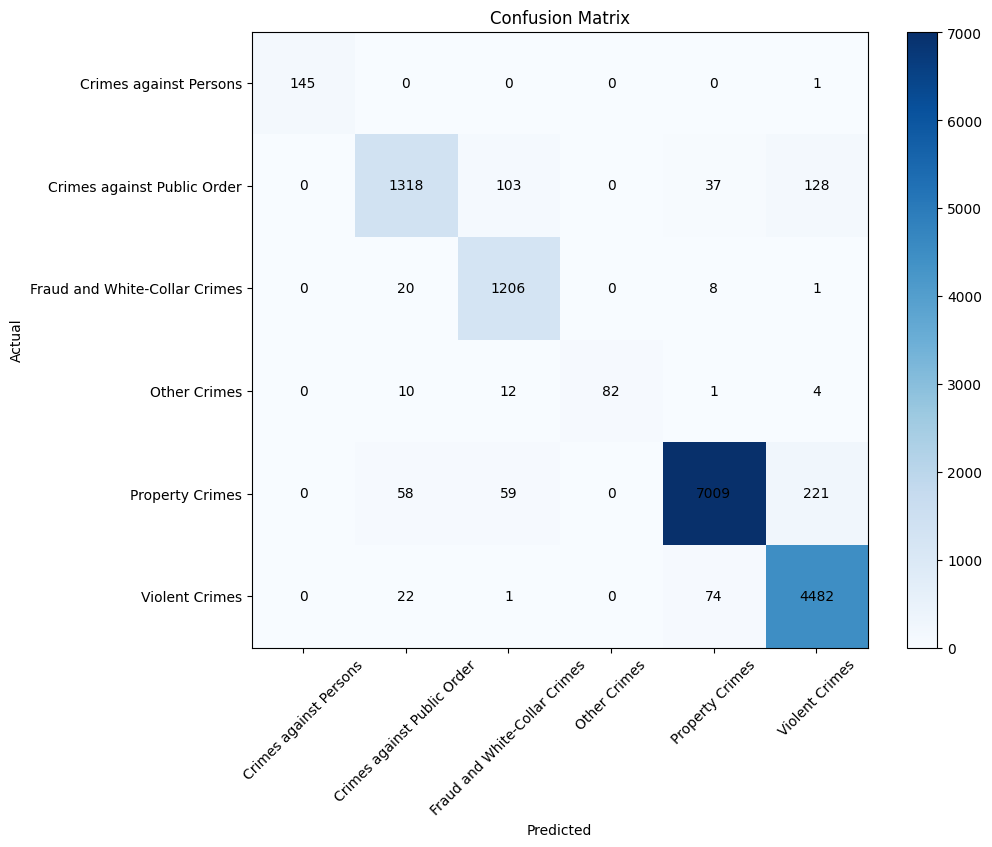

In [600]:
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_target_numeric, y_train_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()

classes = le.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_mat[i, j], 'd'), ha="center", va="center", color="black")

plt.show()

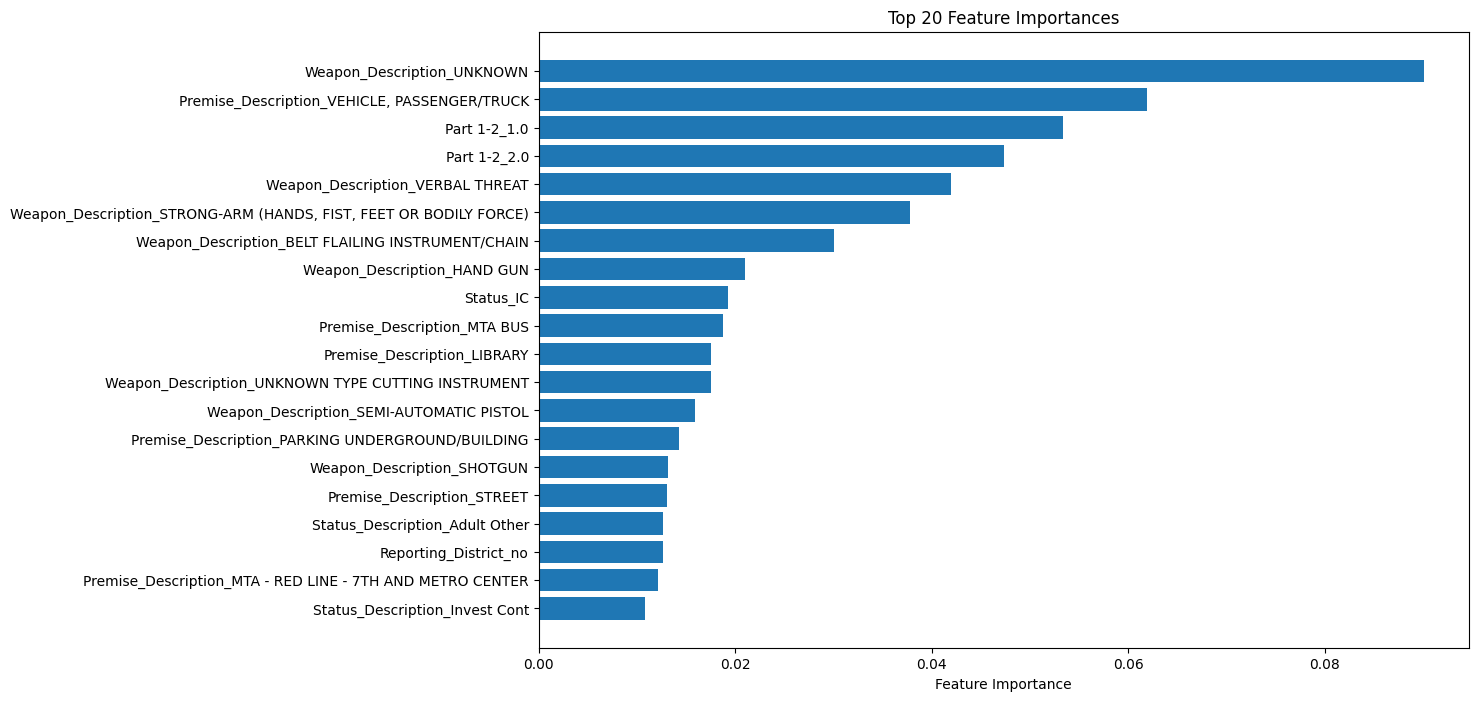

In [601]:
feature_importances = model.named_steps['classifier'].feature_importances_
onehot_columns = model.named_steps['preprocessor'].named_transformers_['low_card'].named_steps['onehot'].get_feature_names_out(low_card_cols)
all_features = np.concatenate([high_card_cols, onehot_columns, numb_columns])
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(range(20), feature_importances[sorted_idx][:20][::-1], align='center')
plt.yticks(range(20), np.array(all_features)[sorted_idx][:20][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()

In [602]:
joblib.dump(model, 'crime_classifier_final.pkl')
joblib.dump(le, 'label_encoder_final.pkl')

['label_encoder_final.pkl']

In [603]:
data_raw = '/kaggle/input/crime-cast-forecasting-crime-categories/train.csv'

df_raw = pd.read_csv(data_raw)
df_raw.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes



Test Metrics:
Accuracy: 0.9049
F1-score (weighted): 0.9070

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.78      0.94      0.85       225
  Crimes against Public Order       0.72      0.81      0.76      1808
Fraud and White-Collar Crimes       0.74      0.93      0.83      1355
                 Other Crimes       0.64      0.61      0.62       179
              Property Crimes       0.98      0.90      0.94     11666
               Violent Crimes       0.89      0.95      0.92      4767

                     accuracy                           0.90     20000
                    macro avg       0.79      0.86      0.82     20000
                 weighted avg       0.91      0.90      0.91     20000



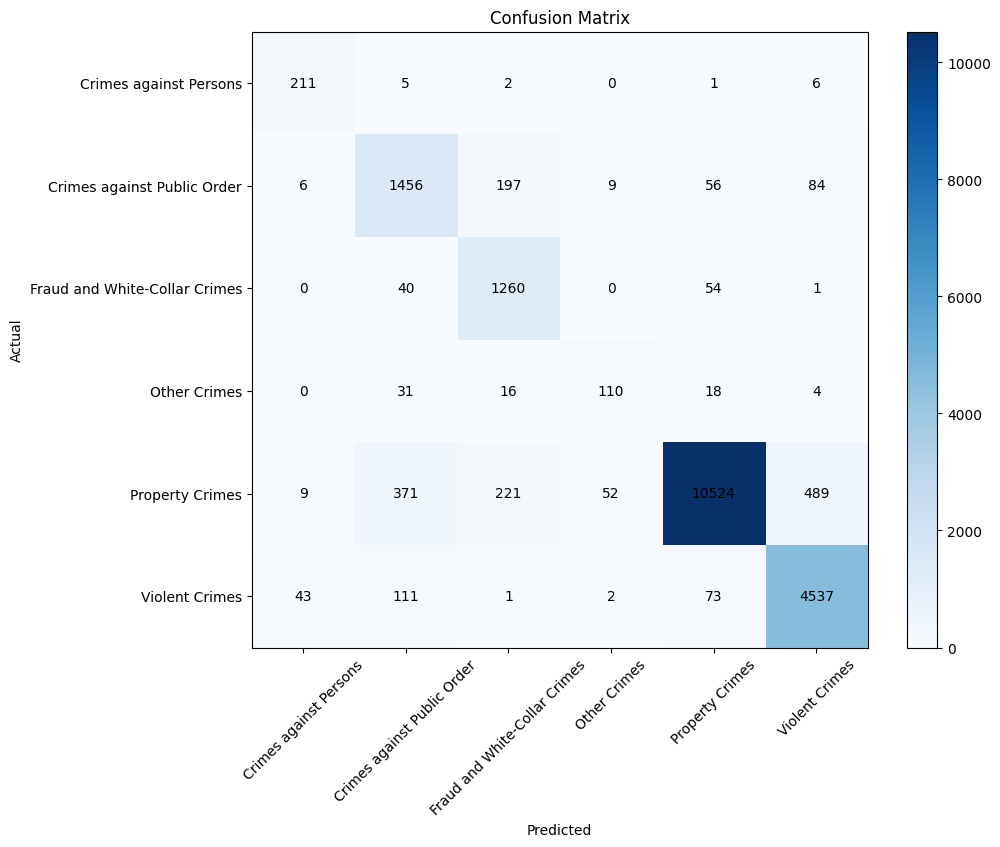

In [604]:
model = joblib.load('crime_classifier_final.pkl')
le = joblib.load('label_encoder_final.pkl')

y_raw = df_raw['Crime_Category']

X_raw = df_raw.drop(columns=['Crime_Category'])

y_raw_pred = model.predict(X_raw)

y_raw_numeric = le.transform(y_raw)

y_raw_pred_labels = le.inverse_transform(y_raw_pred)

print("\nTest Metrics:")
print(f"Accuracy: {accuracy_score(y_raw_numeric, y_raw_pred):.4f}")
print(f"F1-score (weighted): {f1_score(y_raw_numeric, y_raw_pred, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_raw_numeric, y_raw_pred, target_names=le.classes_))

plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_raw_numeric, y_raw_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()

classes = le.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_mat[i, j], 'd'), ha="center", va="center", color="black")

plt.show()